![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Data Driven Business - Final Project - EDA

### Prediction of cancelation of hotel bookings

### Data Source: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

##### Data Dictionary

###### Booking_ID: unique identifier of each booking
###### no_of_adults: Number of adults
###### no_of_children: Number of Children
###### no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
###### no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
###### type_of_meal_plan: Type of meal plan booked by the customer:
###### required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
###### room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
###### lead_time: Number of days between the date of booking and the arrival date
###### arrival_year: Year of arrival date
###### arrival_month: Month of arrival date
###### arrival_date: Date of the month
###### market_segment_type: Market segment designation.
###### repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
###### no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
###### no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
###### avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
###### no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
###### booking_status: Flag indicating if the booking was canceled or not.

##### Importing libraries

In [2]:
import pandas as pd
import numpy as np

##### Importing data

In [3]:
# Read in the data
raw = pd.read_csv('Hotel Reservations.csv')

In [4]:
df = raw.copy()

In [15]:
df.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


##### Analyzing the features

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

The total of null values is: 0


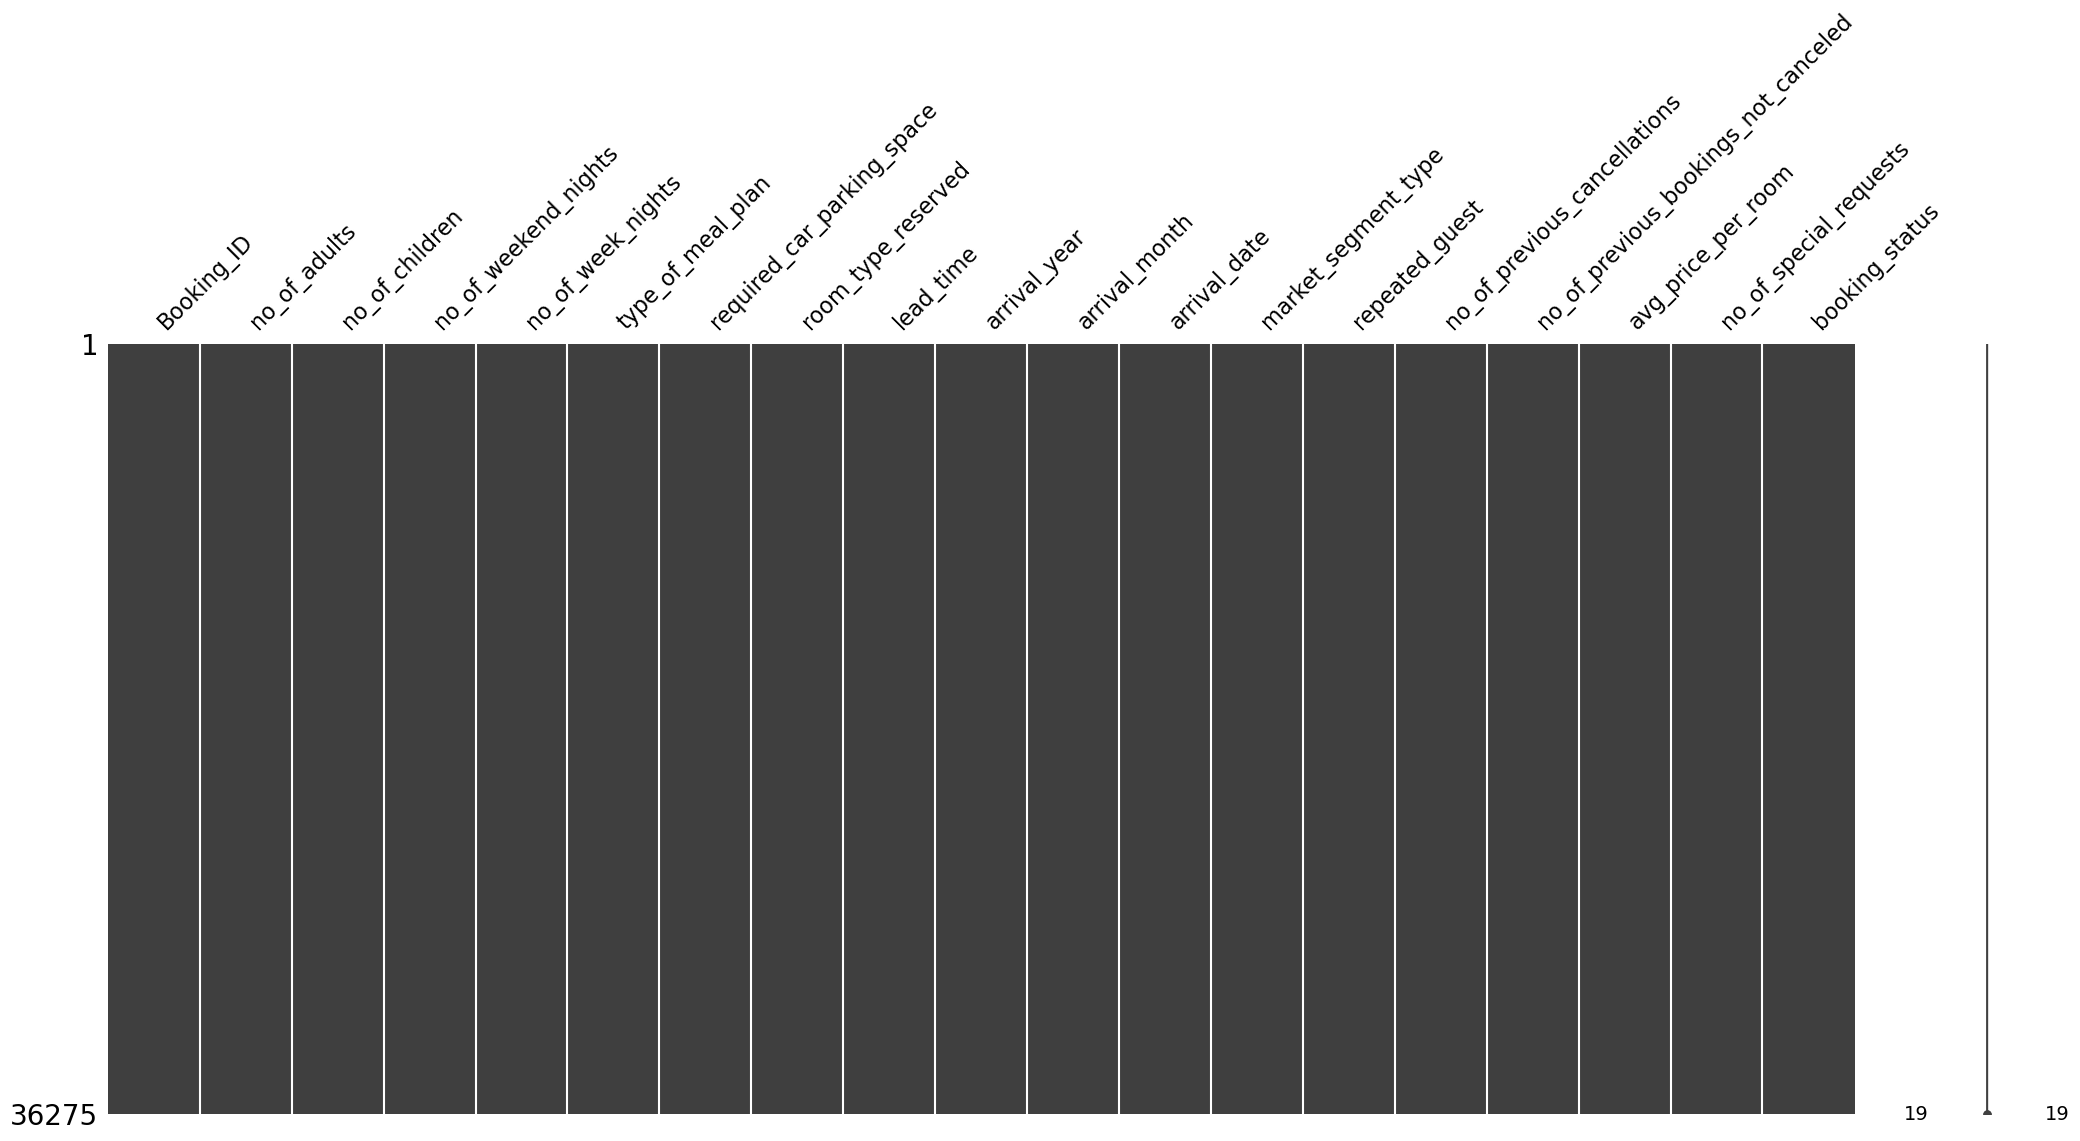

In [6]:
# Plot null values matrix
import missingno as msno
msno.matrix(df)

print("The total of null values is:" , df.isnull().sum().sum())



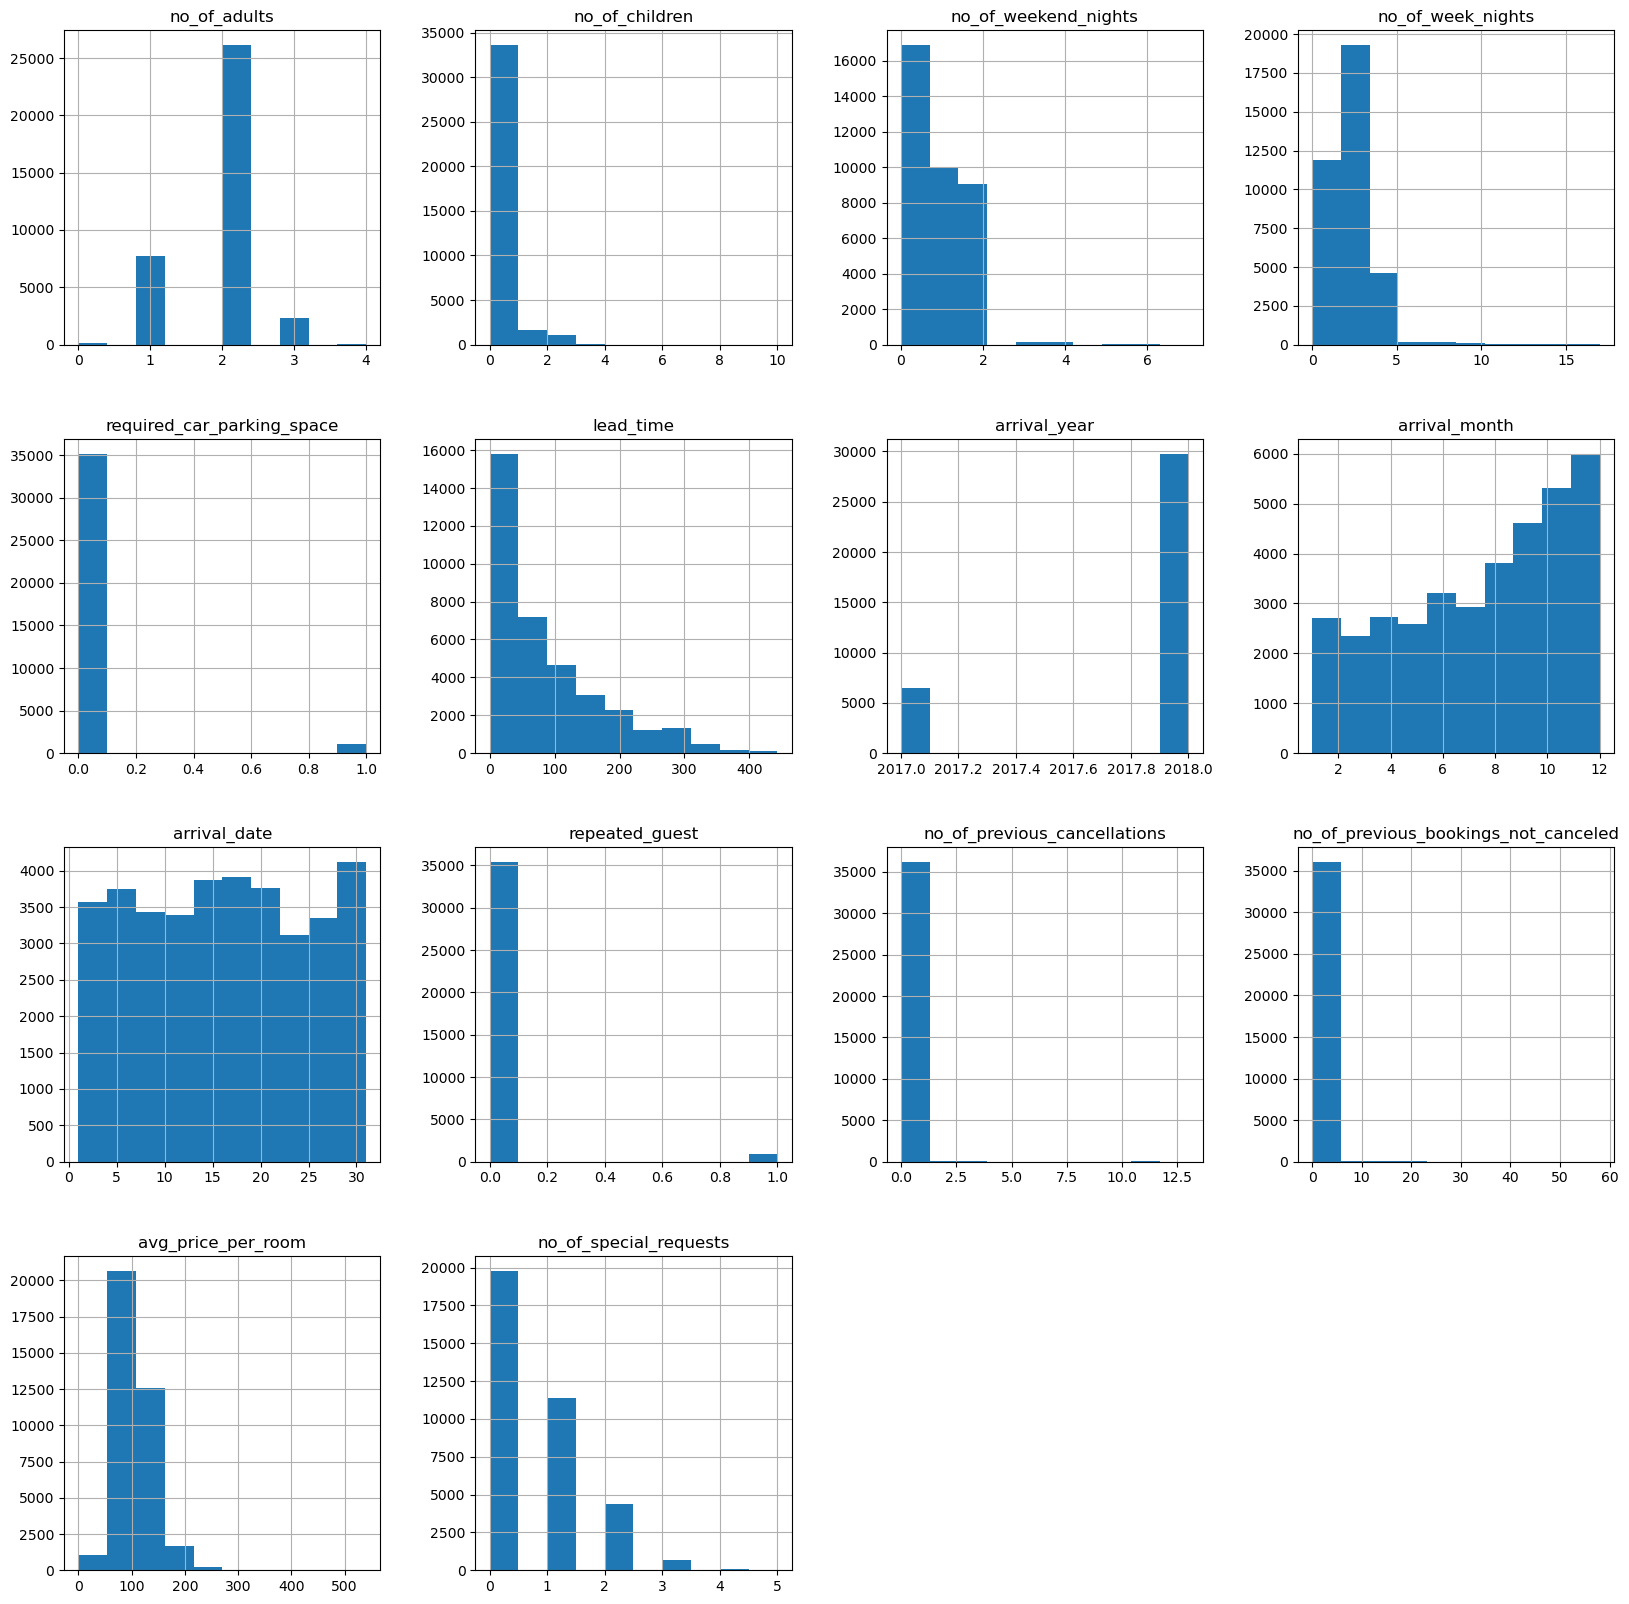

In [7]:
# Plot the distribution of all the features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the distribution of all the features
df.hist(figsize=(20,20))
plt.show()


In [8]:
# Make a list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)


In [9]:
object_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

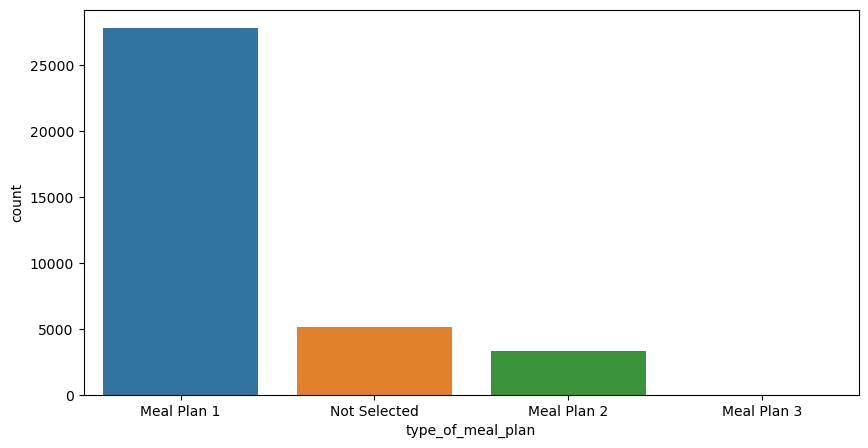

In [11]:
# Plot the distribution of all the categorical features

plt.figure(figsize=(10,5))
sns.countplot(x=df['type_of_meal_plan'], data=df)
plt.show()



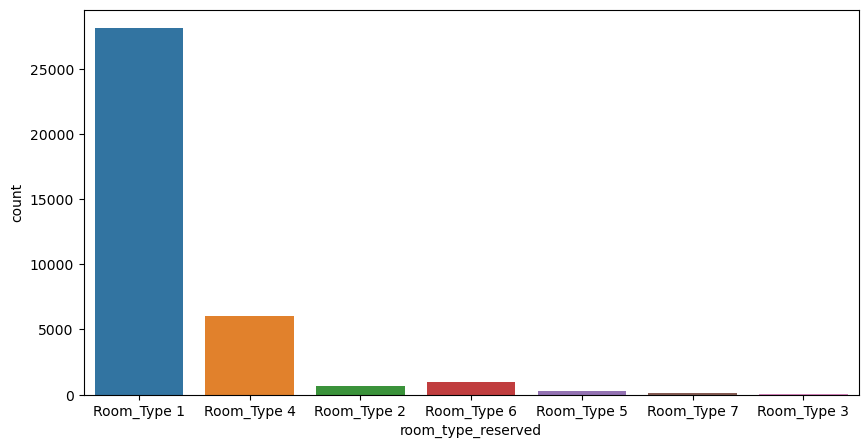

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['room_type_reserved'], data=df)
plt.show()

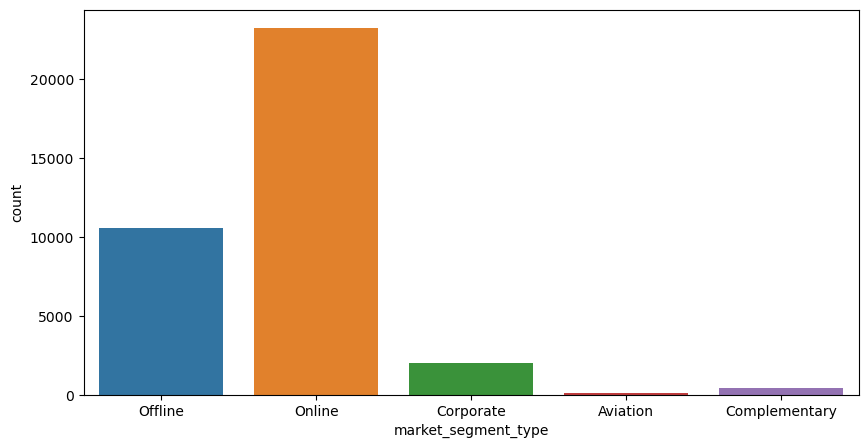

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['market_segment_type'], data=df)
plt.show()

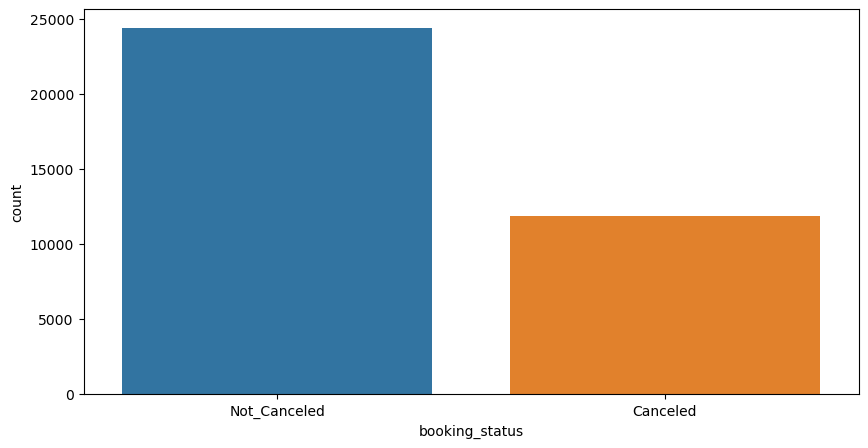

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['booking_status'], data=df)
plt.show()

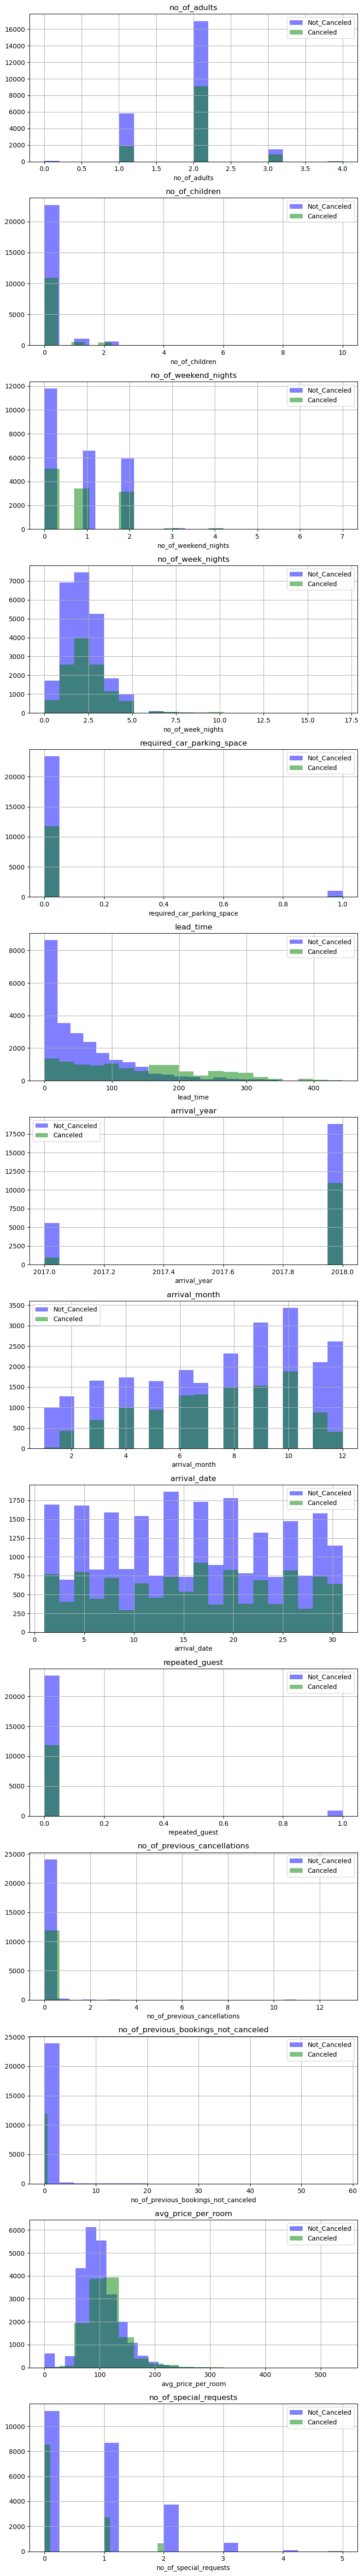

In [17]:
# Get a list of numerical column names
num_cols = list(df.select_dtypes(include=['float64','int64']).columns)

# Set the diagnosed column as the target
target_col = "booking_status"

# Create a list of colors to use for each target class
colors = ["blue", "green"]  

# Create a single figure with subplots for each numerical feature
fig, axs = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 4*len(num_cols)))

# Plot a histogram for each numerical feature, colored by the target
for i, col in enumerate(num_cols):
    for j, val in enumerate(df[target_col].unique()):
        subset = df[df[target_col] == val]
        axs[i].hist(subset[col], bins=20, alpha=0.5, color=colors[j], label=str(val))
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].legend()
    axs[i].grid()

# Save the figure as a JPEG file
plt.tight_layout()
plt.savefig("all_histograms.jpg")